In [1]:
# import packages

import pandas as pd
import numpy as np

import json
import datetime
import math

from datetime import timedelta, datetime

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
from matplotlib import font_manager, rc
import platform

if platform.system() == 'Windows':
# 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    
# Mac 인 경우
    rc('font', family='AppleGothic')

In [22]:
Park = pd.read_csv('G:/Python/EDA/Parking.csv',encoding='cp949')

In [4]:
Park.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14915 entries, 0 to 14914
Data columns (total 33 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   주차장관리번호      14915 non-null  object 
 1   주차장명         14915 non-null  object 
 2   주차장구분        14915 non-null  object 
 3   주차장유형        14915 non-null  object 
 4   소재지도로명주소     8923 non-null   object 
 5   소재지지번주소      14085 non-null  object 
 6   주차구획수        14915 non-null  int64  
 7   급지구분         14915 non-null  object 
 8   부제시행구분       14915 non-null  object 
 9   운영요일         14915 non-null  object 
 10  평일운영시작시각     14915 non-null  object 
 11  평일운영종료시각     14915 non-null  object 
 12  토요일운영시작시각    14915 non-null  object 
 13  토요일운영종료시각    14915 non-null  object 
 14  공휴일운영시작시각    14915 non-null  object 
 15  공휴일운영종료시각    14915 non-null  object 
 16  요금정보         14915 non-null  object 
 17  주차기본시간       14915 non-null  float64
 18  주차기본요금       14915 non-null  int64  
 19  추가단위

In [23]:
Park['관리기관광역시'] = ''

In [16]:
Park = Park.replace(0, np.NaN)

In [17]:
Park['소재지도로명주소'][21], Park['소재지지번주소'][11153], Park['소재지도로명주소'][11153]

(nan, '-', '-')

In [24]:
for i in range(len(Park)) :
    if pd.isna(Park['소재지지번주소'][i]) :
        Park['관리기관광역시'][i] = Park['소재지도로명주소'][i].split(' ')[0]
    elif pd.isna(Park['소재지도로명주소'][i]) :
        Park['관리기관광역시'][i] = Park['소재지지번주소'][i].split(' ')[0]
    else :
        Park['관리기관광역시'][i] = Park['소재지지번주소'][i].split(' ')[0]


In [20]:
Park.isnull().sum()

주차장관리번호            0
주차장명               0
주차장구분              0
주차장유형              0
소재지도로명주소        5992
소재지지번주소          830
주차구획수              2
급지구분               0
부제시행구분             0
운영요일               0
평일운영시작시각           0
평일운영종료시각           0
토요일운영시작시각          0
토요일운영종료시각          0
공휴일운영시작시각          0
공휴일운영종료시각          0
요금정보               0
주차기본시간          7961
주차기본요금          9737
추가단위시간          7467
추가단위요금          7414
1일주차권요금적용시간    12140
1일주차권요금        11663
월정기권요금         11427
결제방법            9377
특기사항           11195
관리기관명              0
전화번호            2222
위도              2163
경도              2150
데이터기준일자            0
제공기관코드             0
제공기관명              0
관리기관광역시            0
dtype: int64

In [25]:
Park

,주차장관리번호,주차장명,주차장구분,주차장유형,소재지도로명주소,소재지지번주소,주차구획수,급지구분,부제시행구분,운영요일,...,결제방법,특기사항,관리기관명,전화번호,위도,경도,데이터기준일자,제공기관코드,제공기관명,관리기관광역시
0,166-2-000032,남새싹5길,공영,노외,인천광역시 부평구 남부역로17번길 26(부평동) 일원,인천광역시 부평구 부평동 747-3,5,기타,미시행,평일+토요일+공휴일,...,NaN,NaN,인천광역시 부평구시설관리공단,032-262-9220,37.489035,126.720057,2021-01-04,3540000,인천광역시 부평구,인천광역시
1,166-2-000034,화랑로,공영,노외,인천광역시 부평구 화랑로 124(산곡동) 일원,인천광역시 부평구 산곡동 371-82,54,4,요일제,평일+토요일+공휴일,...,현금,NaN,인천광역시 부평구시설관리공단,032-262-9220,37.493609,126.702259,2021-01-04,3540000,인천광역시 부평구,인천광역시
2,166-2-000035,늘봄1길,공영,노외,인천광역시 부평구 동수북로60번길 1,인천광역시 부평구 부평동 767-190,5,기타,미시행,평일+토요일+공휴일,...,NaN,NaN,인천광역시 부평구시설관리공단,032-262-9220,37.487199,126.713847,2021-01-04,3540000,인천광역시 부평구,인천광역시
3,166-2-000036,남부역1길,공영,노외,인천광역시 부평구 장제로27번길 17(부평동) 인근,인천광역시 부평구 부평동 610-3,10,기타,미시행,평일+토요일+공휴일,...,NaN,NaN,인천광역시 부평구시설관리공단,032-262-9220,37.487915,126.728147,2021-01-04,3540000,인천광역시 부평구,인천광역시
4,166-2-000037,산곡배움2길,공영,노외,인천광역시 부평구 화랑남로9번길 20(산곡동) 일원,인천광역시 부평구 산곡동 311-102,8,기타,미시행,평일+토요일+공휴일,...,NaN,NaN,인천광역시 부평구시설관리공단,032-262-9220,37.493425,126.706043,2021-01-04,3540000,인천광역시 부평구,인천광역시
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14910,101-1-000008,남대문 시장,공영,노상,서울특별시 중구 남창동 51-4,서울특별시 중구 남창동 51-4,4,1,미시행,평일+토요일+공휴일,...,NaN,NaN,서울시설공단,02-2290-6449,37.559556,127.975791,2019-04-30,B553774,서울시설공단,서울특별시
14911,101-1-000003,남대문 초입,공영,노상,서울특별시 중구 남창동 소월길 51-4,서울특별시 중구 남창동 소월길 51-4,3,1,미시행,평일+토요일+공휴일,...,NaN,NaN,서울시설공단,02-2290-6449,37.559718,126.975617,2019-04-30,B553774,서울시설공단,서울특별시
14912,101-1-000026,남대문 화물,공영,노상,서울특별시 중구 남대문로 4가 24-1(남대문로 18),서울특별시 중구 남대문로 4가 24-1(남대문로 18),9,1,미시행,평일+토요일+공휴일,...,NaN,NaN,서울시설공단,02-2663-6209,37.560708,126.976815,2019-04-30,B553774,서울시설공단,서울특별시
14913,117-2-000001,남부여성발전센터,공영,노외,서울특별시 금천구 독산로50길 23 (시흥동),서울특별시 금천구 시흥동 산 139-2,129,3,미시행,평일+토요일+공휴일,...,NaN,NaN,서울시설공단,070-7119-2603,37.463149,126.906039,2019-04-30,B553774,서울시설공단,서울특별시


In [14]:
group_park = Park.groupby(Park['관리기관광역시']).count()
group_park1 = group_park[group_park.주차장관리번호 > 5]
group_park1

,주차장관리번호,주차장명,주차장구분,주차장유형,소재지도로명주소,소재지지번주소,주차구획수,급지구분,부제시행구분,운영요일,...,월정기권요금,결제방법,특기사항,관리기관명,전화번호,위도,경도,데이터기준일자,제공기관코드,제공기관명
관리기관광역시,,,,,,,,,,,,,,,,,,,,,
강원도,1020,1020,1020,1020,449,1020,1020,1020,1020,1020,...,163,265,154,1020,811,905,907,1020,1020,1020
경기도,2292,2292,2292,2292,1194,2084,2292,2292,2292,2292,...,923,1361,1291,2292,2107,1937,1934,2292,2292,2292
경상남도,1244,1244,1244,1244,627,1045,1243,1244,1244,1244,...,127,230,121,1244,973,998,992,1244,1244,1244
경상북도,1475,1475,1475,1475,783,1203,1474,1475,1475,1475,...,100,231,284,1475,806,1193,1191,1475,1475,1475
광주광역시,417,417,417,417,303,406,417,417,417,417,...,49,57,91,417,417,366,366,417,417,417
대구광역시,1051,1051,1051,1051,757,1032,1051,1051,1051,1051,...,281,499,124,1051,1014,1012,1014,1051,1051,1051
대전광역시,864,864,864,864,697,862,864,864,864,864,...,80,145,65,864,849,425,424,864,864,864
부산광역시,728,728,728,728,532,722,728,728,728,728,...,380,446,158,728,634,555,556,728,728,728
서울특별시,941,941,941,941,840,902,941,941,941,941,...,584,724,403,941,873,907,907,941,941,941


In [15]:
group_park1 = group_park1.reset_index()
group_park1

,관리기관광역시,주차장관리번호,주차장명,주차장구분,주차장유형,소재지도로명주소,소재지지번주소,주차구획수,급지구분,부제시행구분,...,월정기권요금,결제방법,특기사항,관리기관명,전화번호,위도,경도,데이터기준일자,제공기관코드,제공기관명
0,강원도,1020,1020,1020,1020,449,1020,1020,1020,1020,...,163,265,154,1020,811,905,907,1020,1020,1020
1,경기도,2292,2292,2292,2292,1194,2084,2292,2292,2292,...,923,1361,1291,2292,2107,1937,1934,2292,2292,2292
2,경상남도,1244,1244,1244,1244,627,1045,1243,1244,1244,...,127,230,121,1244,973,998,992,1244,1244,1244
3,경상북도,1475,1475,1475,1475,783,1203,1474,1475,1475,...,100,231,284,1475,806,1193,1191,1475,1475,1475
4,광주광역시,417,417,417,417,303,406,417,417,417,...,49,57,91,417,417,366,366,417,417,417
5,대구광역시,1051,1051,1051,1051,757,1032,1051,1051,1051,...,281,499,124,1051,1014,1012,1014,1051,1051,1051
6,대전광역시,864,864,864,864,697,862,864,864,864,...,80,145,65,864,849,425,424,864,864,864
7,부산광역시,728,728,728,728,532,722,728,728,728,...,380,446,158,728,634,555,556,728,728,728
8,서울특별시,941,941,941,941,840,902,941,941,941,...,584,724,403,941,873,907,907,941,941,941
9,세종특별자치시,81,81,81,81,81,73,81,81,81,...,0,16,9,81,81,73,73,81,81,81


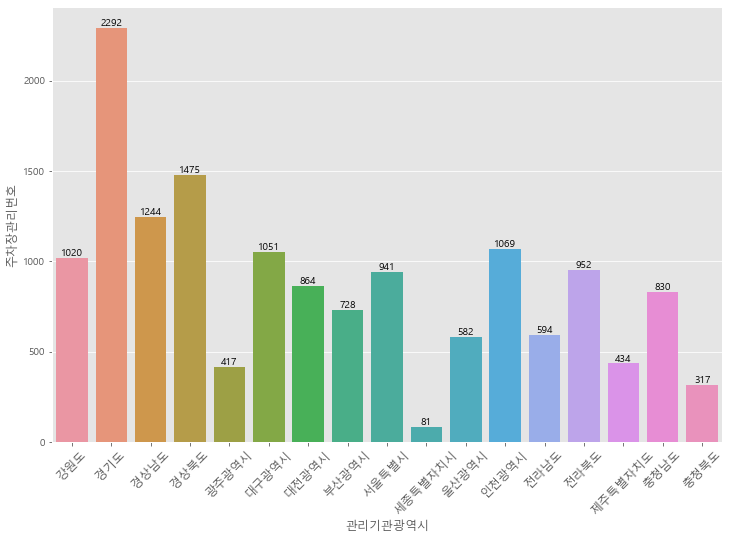

In [16]:
group_park2 = sns.barplot(data= group_park1,x= "관리기관광역시",y= "주차장관리번호", ci=None)
#annotate axis = seaborn axis 
for p in group_park2.patches: 
    group_park2.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height() - 30), 
       ha='center', va='center', fontsize=10, color='black', xytext=(0, 10), 
       textcoords='offset points')

plt.xticks(fontsize=12, rotation=45)
plt.show()

In [17]:
Busan_park = Park[Park['관리기관광역시'].str.contains('부산광역시')] ## df[조건식]
Busan_park = Busan_park.reset_index()
Busan_park

,index,주차장관리번호,주차장명,주차장구분,주차장유형,소재지도로명주소,소재지지번주소,주차구획수,급지구분,부제시행구분,...,결제방법,특기사항,관리기관명,전화번호,위도,경도,데이터기준일자,제공기관코드,제공기관명,관리기관광역시
0,381,144-2-000006,모라중학교 지하(노외),공영,노외,부산광역시 사상구 백양대로 936,부산광역시 사상구 모라동 1348,136.0,3,미시행,...,현금,NaN,부산광역시 사상구청,051-310-4515,35.190671,128.992444,2021-06-23,3390000,부산광역시 사상구,부산광역시
1,382,144-2-000007,감전역 역세권 공영주차장,공영,노외,부산광역시 사상구 백양대로 936,부산광역시 사상구 모라동 1348,215.0,3,미시행,...,현금,NaN,부산광역시 사상구청,051-310-4515,35.190671,128.992444,2021-06-23,3390000,부산광역시 사상구,부산광역시
2,479,132-1-000119,범일2동-업무지-2구간,공영,노상,부산광역시 동구 자성로141번길 13,부산광역시 동구 범일동 830-240,1.0,1,미시행,...,NaN,NaN,부산광역시 동구청,051-440-4741,35.138421,129.065567,2021-06-17,3270000,부산광역시 동구,부산광역시
3,480,132-1-000120,범일2동-업무지-3구간,공영,노상,부산광역시 동구 자성로87번길 4,부산광역시 동구 범일동 355-7,5.0,1,미시행,...,NaN,NaN,부산광역시 동구청,051-440-4741,35.135057,129.061182,2021-06-17,3270000,부산광역시 동구,부산광역시
4,481,132-1-000121,범일2동-업무지-5구간,공영,노상,부산광역시 동구 자성로 99,부산광역시 동구 범일동 590-5,7.0,1,미시행,...,NaN,NaN,부산광역시 동구청,051-440-4741,35.135744,129.060449,2021-06-17,3270000,부산광역시 동구,부산광역시
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,14867,141-4-000061,강서제일 주차장,민영,노외,NaN,"부산광역시 강서구 대저2동 1841-1,1842-5,1842-1-,1842-13,1...",16.0,기타,미시행,...,NaN,NaN,부산광역시 강서구,NaN,35.180766,128.956314,2021-04-20,3360000,부산광역시 강서구,부산광역시
724,14868,141-4-000060,오복미역 전용 주차장,민영,노외,NaN,부산광역시 강서구 화전동 555-1,19.0,기타,미시행,...,NaN,NaN,부산광역시 강서구,NaN,35.112201,128.880533,2021-04-20,3360000,부산광역시 강서구,부산광역시
725,14869,141-4-000059,위드주차장,민영,노외,NaN,부산광역시 강서구 대저2동 2509-1,30.0,기타,미시행,...,NaN,NaN,부산광역시 강서구,NaN,35.173118,128.958251,2021-04-20,3360000,부산광역시 강서구,부산광역시
726,14870,141-4-000058,뉴공항주차장,민영,노외,부산광역시 강서구 공항진입로 11,부산광역시 강서구 대저2동 1842-10,13.0,기타,미시행,...,NaN,NaN,부산광역시 강서구,NaN,35.180793,128.956304,2021-04-20,3360000,부산광역시 강서구,부산광역시


In [18]:
Busan_park['관리기관구별'] = ' '

In [19]:
for i in range(len(Busan_park)) :
    if pd.isna(Busan_park['소재지지번주소'][i]) :
        Busan_park['관리기관구별'][i] = Busan_park['소재지도로명주소'][i].split(' ')[1]
    elif pd.isna(Busan_park['소재지도로명주소'][i]) :
        Busan_park['관리기관구별'][i] = Busan_park['소재지지번주소'][i].split(' ')[1]
    else :
        Busan_park['관리기관구별'][i] = Busan_park['소재지지번주소'][i].split(' ')[1]


In [42]:
Busan_park['주차장구분']

0      공영
1      공영
2      공영
3      공영
4      공영
       ..
723    민영
724    민영
725    민영
726    민영
727    민영
Name: 주차장구분, Length: 728, dtype: object

In [26]:
Busan_park_sa = Busan_park['주차장구분'] == '민영'
Busan_park_sa

0      False
1      False
2      False
3      False
4      False
       ...  
723     True
724     True
725     True
726     True
727     True
Name: 주차장구분, Length: 728, dtype: bool

In [53]:
Busan_group_park = Busan_park.groupby(Busan_park['관리기관구별']).count()
Busan_group_park1 = Busan_group_park[Busan_group_park.주차장명 > 5]
Busan_group_park1 = Busan_group_park1.reset_index()
Busan_group_park1.to_csv('G:/Python/Busan_group_park3.csv', encoding='cp949')

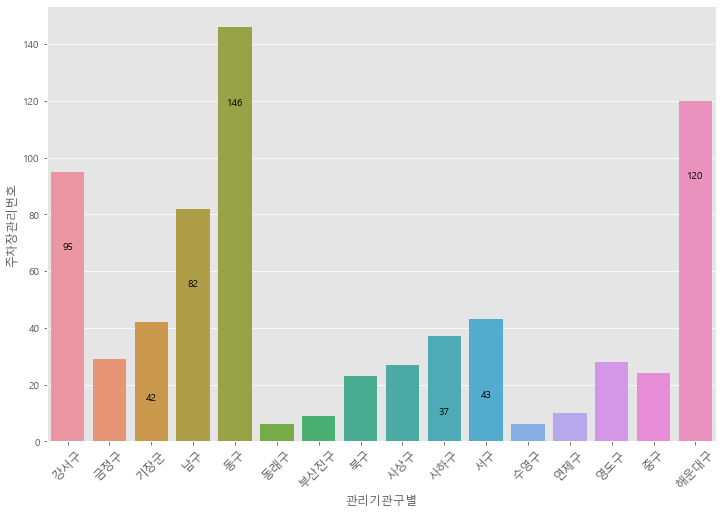

In [21]:
Busan_group_park2 = sns.barplot(data= Busan_group_park1,x= "관리기관구별",y= "주차장관리번호", ci=None)
#annotate axis = seaborn axis 
for p in Busan_group_park2.patches: 
    Busan_group_park2.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height() - 30), 
       ha='center', va='center', fontsize=10, color='black', xytext=(0, 10), 
       textcoords='offset points')

plt.xticks(fontsize=12, rotation=45)
plt.show()

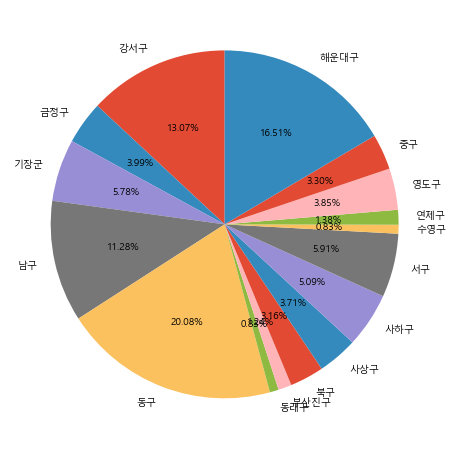

In [24]:
fig = plt.figure(figsize=(8,8)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 배경색을 하얀색으로 설정
ax = fig.add_subplot() ## 프레임 생성

ax.pie(Busan_group_park1['주차장관리번호'], ## 파이차트 출력
       labels=Busan_group_park1['관리기관구별'], ## 라벨 출력
       startangle=90, ## 시작점을 90도(degree)로 지정
       counterclock=True, ## 반시계 방향으로 파이차트를 그린다.
       autopct=lambda p : '{:.2f}%'.format(p) ## 퍼센티지 출력

       )
 
plt.show()

In [43]:
Busan_seo_park = Busan_park['관리기관구별'] == '해운대구'
Busan_seo_park1 = Busan_park[Busan_seo_park]
Busan_seo_park1

,index,주차장관리번호,주차장명,주차장구분,주차장유형,소재지도로명주소,소재지지번주소,주차구획수,급지구분,부제시행구분,...,특기사항,관리기관명,전화번호,위도,경도,데이터기준일자,제공기관코드,제공기관명,관리기관광역시,관리기관구별
22,656,138-4-000070,대천주차장,민영,노외,부산광역시 해운대구 좌2동1482-4,부산광역시 해운대구 좌2동1482-4,20.0,기타,미시행,...,NaN,부산광역시 해운대구,051-749-4554,NaN,NaN,2021-01-15,3330000,부산광역시 해운대구,부산광역시,해운대구
23,657,138-4-000071,진영주차장,민영,노외,"부산광역시 해운대구 좌2동1480-2,3","부산광역시 해운대구 좌2동1480-2,3",32.0,기타,미시행,...,NaN,부산광역시 해운대구,051-749-4554,NaN,NaN,2021-01-15,3330000,부산광역시 해운대구,부산광역시,해운대구
64,966,138-4-000067,해동주차장,민영,노외,부산광역시 해운대구 우1동381-1,부산광역시 해운대구 우1동381-1,16.0,기타,미시행,...,NaN,부산광역시 해운대구,051-749-4554,NaN,NaN,2021-01-15,3330000,부산광역시 해운대구,부산광역시,해운대구
65,967,138-4-000068,강남주차장,민영,노외,부산광역시 해운대구 반송1동250-1751,부산광역시 해운대구 반송1동250-1751,3.0,기타,미시행,...,NaN,부산광역시 해운대구,051-749-4554,NaN,NaN,2021-01-15,3330000,부산광역시 해운대구,부산광역시,해운대구
66,968,138-4-000069,해운대비치주차장,민영,노외,부산광역시 해운대구 우1동649-1,부산광역시 해운대구 우1동649-1,17.0,기타,미시행,...,NaN,부산광역시 해운대구,051-749-4554,NaN,NaN,2021-01-15,3330000,부산광역시 해운대구,부산광역시,해운대구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,13878,138-4-000072,지에스타임즈스테이션센텀필주차장,민영,노외,부산광역시 해운대구 재송1동12201221,부산광역시 해운대구 재송1동12201221,290.0,기타,미시행,...,NaN,부산광역시 해운대구,051-749-4554,NaN,NaN,2021-01-15,3330000,부산광역시 해운대구,부산광역시,해운대구
686,13879,138-4-000073,해운대온천센터주차장,민영,노외,부산광역시 해운대구 중1동1226-3외 7필지,부산광역시 해운대구 중1동1370-7외 8필지,158.0,기타,미시행,...,NaN,부산광역시 해운대구,051-749-4554,NaN,NaN,2021-01-15,3330000,부산광역시 해운대구,부산광역시,해운대구
687,13880,138-4-000074,신리주차장,민영,노외,부산광역시 해운대구 반송2동788-15외2,부산광역시 해운대구 반송2동788-15외2,13.0,기타,미시행,...,NaN,부산광역시 해운대구,051-749-4554,NaN,NaN,2021-01-15,3330000,부산광역시 해운대구,부산광역시,해운대구
688,13881,138-4-000075,센텀Q주차장,민영,노외,부산광역시 해운대구 우2동1483,부산광역시 해운대구 우2동1483,399.0,기타,미시행,...,NaN,부산광역시 해운대구,051-749-4554,NaN,NaN,2021-01-15,3330000,부산광역시 해운대구,부산광역시,해운대구


In [44]:
Busan_seo_park2 = Busan_seo_park1.groupby(Busan_seo_park1['주차장구분']).count()
Busan_seo_park2 = Busan_seo_park2[Busan_seo_park2.주차장관리번호 > 5]
Busan_seo_park2 = Busan_seo_park2.reset_index()
Busan_seo_park2

,주차장구분,index,주차장관리번호,주차장명,주차장유형,소재지도로명주소,소재지지번주소,주차구획수,급지구분,부제시행구분,...,특기사항,관리기관명,전화번호,위도,경도,데이터기준일자,제공기관코드,제공기관명,관리기관광역시,관리기관구별
0,공영,24,24,24,24,24,24,24,24,24,...,6,24,24,9,9,24,24,24,24,24
1,민영,96,96,96,96,96,96,96,96,96,...,10,96,96,9,9,96,96,96,96,96


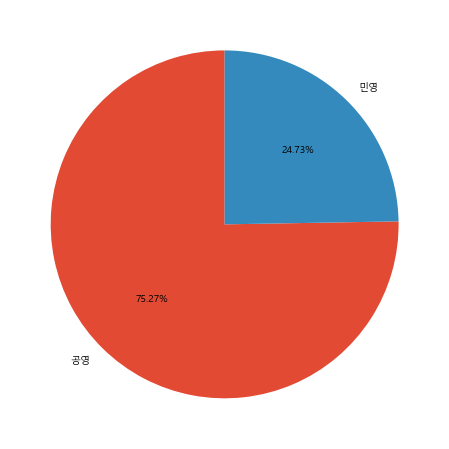

In [35]:
fig = plt.figure(figsize=(8,8)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 배경색을 하얀색으로 설정
ax = fig.add_subplot() ## 프레임 생성

ax.pie(pbsa_group_park1['주차장관리번호'], ## 파이차트 출력
       labels=pbsa_group_park1['주차장구분'], ## 라벨 출력
       startangle=90, ## 시작점을 90도(degree)로 지정
       counterclock=True, ## 반시계 방향으로 파이차트를 그린다.
       autopct=lambda p : '{:.2f}%'.format(p) ## 퍼센티지 출력

       )
 
plt.show()

In [ ]:
Park = Park.replace(0, np.NaN)
Park['소재지도로명주소']

In [ ]:
print('주차기본요금평균:' , np.nanmean(Park['주차기본요금']))
print('1일주차권요금평균:' , np.nanmean(Park['1일주차권요금']))
print('월정기권요금평균:' , np.nanmean(Park['월정기권요금']))

In [ ]:
Park_pb = Park['주차장구분'] == '공영'
Park_npb = Park['주차장구분'] == '민영'
Park_pb1 = Park[Park_pb]
Park_npb1 = Park[Park_npb]


In [ ]:
print('공영주차장 주차기본요금평균:', np.nanmean(Park_pb1['주차기본요금']))
print('민영주차장 주차기본요금평균:', np.nanmean(Park_npb1['주차기본요금']))

In [ ]:
print('공영주차장 1일주차권요금평균:', np.nanmean(Park_pb1['1일주차권요금']))
print('민영주차장 1일주차권요금평균:', np.nanmean(Park_npb1['1일주차권요금']))


In [ ]:
print('공영주차장 월정기권요금평균:', np.nanmean(Park_pb1['월정기권요금']))
print('민영주차장 월정기권요금평균:', np.nanmean(Park_npb1['월정기권요금']))

In [ ]:
bspark = Park[Park['관리기관명'].str.contains('부산광역시_서구')] ## df[조건식]
bspark['주차기본요금']

In [ ]:
Bspark = Park[Park['관리기관명'].str.contains('부산광역시')] ## df[조건식]

In [ ]:
print('부산주차장 주차기본요금평균:', np.nanmean(Bspark['주차기본요금']))
print('부산주차장 1일주차권요금평균:', np.nanmean(Bspark['1일주차권요금']))
print('부산주차장 월정기권요금평균:', np.nanmean(Bspark['월정기권요금']))

0      부산광역시 사상구
1      부산광역시 사상구
2       부산광역시 동구
3       부산광역시 동구
4       부산광역시 동구
         ...    
723    부산광역시 강서구
724    부산광역시 강서구
725    부산광역시 강서구
726    부산광역시 강서구
727    부산광역시 강서구
Name: 제공기관명, Length: 728, dtype: object

In [93]:
Park = pd.read_csv('G:/Python/EDA/Parking.csv',encoding='cp949')


In [94]:
Busan_dong_park = Park[Park['제공기관명'].str.contains('부산광역시 서구')] ## df[조건식]
Busan_dong_park = Busan_dong_park.reset_index()
Busan_dong_park 


,index,주차장관리번호,주차장명,주차장구분,주차장유형,소재지도로명주소,소재지지번주소,주차구획수,급지구분,부제시행구분,...,월정기권요금,결제방법,특기사항,관리기관명,전화번호,위도,경도,데이터기준일자,제공기관코드,제공기관명
0,12096,131-2-000002,송도공영,공영,노외,NaN,부산광역시 서구 암남동 579,49,2,요일제,...,NaN,"현금,신용카드",부산광역시 주차장 설치 및 관리 조례에 따른 주차요금 감면 적용,부산광역시_서구,051-240-4512,35.073742,129.015712,2020-03-01,3260000,부산광역시 서구
1,12097,131-2-000016,암남공원공영,공영,노외,NaN,부산광역시 서구 암남동 620-4,339,2,요일제,...,NaN,"현금,신용카드",부산광역시 주차장 설치 및 관리 조례에 따른 주차요금 감면 적용,부산광역시_서구,051-240-4512,35.079926,129.021288,2020-03-01,3260000,부산광역시 서구
2,12115,131-2-000014,남부민2동공영,공영,노외,NaN,부산광역시 서구 남부민동 595-2,149,4,요일제,...,NaN,현금,부산광역시 주차장 설치 및 관리 조례에 따른 주차요금 감면 적용,부산광역시_서구,051-240-4555,35.083868,129.020265,2020-03-01,3260000,부산광역시 서구
3,12153,131-2-000017,천해로공영,공영,노외,NaN,부산광역시 서구 남부민동 434-227,54,4,요일제,...,NaN,현금,부산광역시 주차장 설치 및 관리 조례에 따른 주차요금 감면 적용,부산광역시_서구,051-240-4555,35.084245,129.016352,2020-03-01,3260000,부산광역시 서구
4,12179,131-2-000011,해돋이공영,공영,노외,NaN,부산광역시 서구 남부민동 50-13,102,4,요일제,...,NaN,현금,부산광역시 주차장 설치 및 관리 조례에 따른 주차요금 감면 적용,부산광역시_서구,051-240-4555,35.091305,129.021139,2020-03-01,3260000,부산광역시 서구
5,12332,131-2-000010,아미초등학교지하공영,공영,노외,NaN,부산광역시 서구 아미동2가 89,76,4,요일제,...,NaN,현금,부산광역시 주차장 설치 및 관리 조례에 따른 주차요금 감면 적용,부산광역시_서구,051-240-4512,35.098114,129.016312,2020-03-01,3260000,부산광역시 서구
6,12333,131-2-000009,아미골공영,공영,노외,NaN,부산광역시 서구 아미동2가 212-8,62,4,요일제,...,NaN,현금,부산광역시 주차장 설치 및 관리 조례에 따른 주차요금 감면 적용,부산광역시_서구,051-240-4512,35.099165,129.013623,2020-03-01,3260000,부산광역시 서구
7,12334,131-2-000008,아미까치공영,공영,노외,NaN,부산광역시 서구 아미동2가 249-1,69,4,요일제,...,NaN,현금,부산광역시 주차장 설치 및 관리 조례에 따른 주차요금 감면 적용,부산광역시_서구,051-240-4512,35.095323,129.020626,2020-03-01,3260000,부산광역시 서구
8,12335,131-2-000015,충무동골목시장공영,공영,노외,NaN,부산광역시 서구 충무동1가 37-1,13,2,요일제,...,NaN,현금,부산광역시 주차장 설치 및 관리 조례에 따른 주차요금 감면 적용,부산광역시_서구,051-240-4512,35.103343,129.017765,2020-03-01,3260000,부산광역시 서구
9,12336,131-2-000001,충무동새벽시장공영,공영,노외,NaN,부산광역시 서구 남부민동 685-1,70,2,요일제,...,NaN,"현금,신용카드",부산광역시 주차장 설치 및 관리 조례에 따른 주차요금 감면 적용,부산광역시_서구,051-240-4555,35.092783,129.024925,2020-03-01,3260000,부산광역시 서구


In [29]:
Busan_dong_park.isnull().sum()

index            0
주차장관리번호          0
주차장명             0
주차장구분            0
주차장유형            0
소재지도로명주소       196
소재지지번주소          6
주차구획수            0
급지구분             0
부제시행구분           0
운영요일             0
평일운영시작시각         0
평일운영종료시각         0
토요일운영시작시각        0
토요일운영종료시각        0
공휴일운영시작시각        0
공휴일운영종료시각        0
요금정보             0
주차기본시간           0
주차기본요금           0
추가단위시간         377
추가단위요금         377
1일주차권요금적용시간    560
1일주차권요금        357
월정기권요금         308
결제방법           282
특기사항           570
관리기관명            0
전화번호            94
위도             173
경도             172
데이터기준일자          0
제공기관코드           0
제공기관명            0
관리기관광역시          0
dtype: int64

In [31]:
Busan_dong_park

In [95]:
Busan_dong_park['관리기관동별']= ' '

In [96]:
for i in range(len(Busan_dong_park)) :
    if pd.isna(Busan_dong_park['소재지지번주소'][i]) :
        Busan_dong_park['관리기관동별'][i] = Busan_dong_park['소재지도로명주소'][i].split(' ')[2]
    elif pd.isna(Busan_dong_park['소재지도로명주소'][i]) :
        Busan_dong_park['관리기관동별'][i] = Busan_dong_park['소재지지번주소'][i].split(' ')[2]
    else :
        Busan_dong_park['관리기관동별'][i] = Busan_dong_park['소재지지번주소'][i].split(' ')[2]


In [101]:
Busan_dong_park1 = Busan_dong_park.groupby(Busan_dong_park['관리기관동별']).count()
Busan_dong_park1 = Busan_dong_park1.reset_index()
Busan_dong_park1 = Busan_dong_park1.iloc[:,[0,2]]
Busan_dong_park1.columns=['법정동별', 'Count']

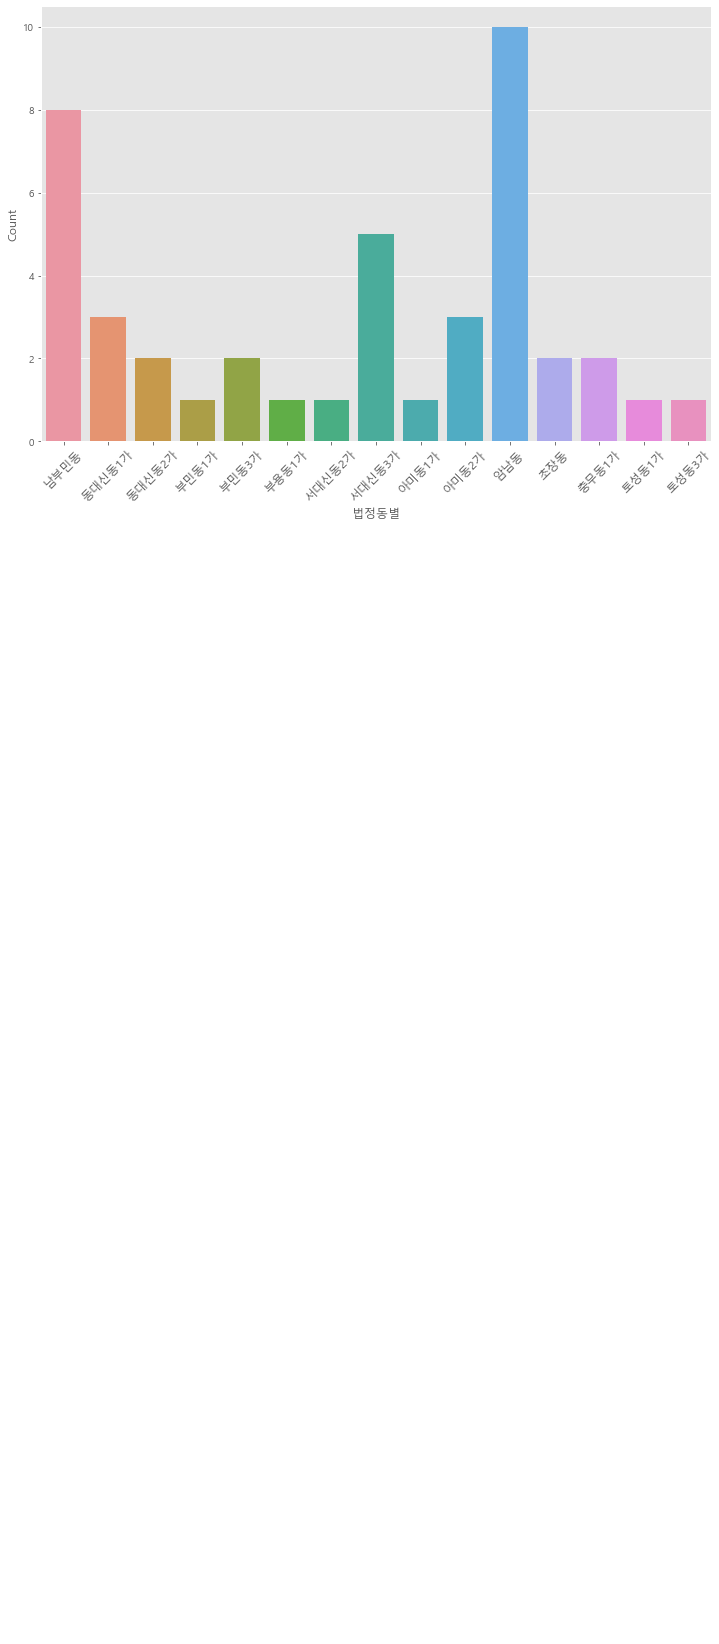

In [103]:
Busan_dong_park2 = sns.barplot(data= Busan_dong_park1,x= "법정동별",y= "Count", ci=None)
#annotate axis = seaborn axis 
for p in Busan_dong_park2.patches: 
    Busan_dong_park2.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height() - 30), 
       ha='center', va='center', fontsize=10, color='black', xytext=(0, 10), 
       textcoords='offset points')

plt.xticks(fontsize=12, rotation=45)
plt.show()